In [38]:
import pandas as pd
credit_record = pd.read_csv("credit_record.csv")
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [39]:
application_record = pd.read_csv("application_record.csv")
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [40]:
pt=pd.pivot_table(data=credit_record,index='ID',columns='STATUS',values='MONTHS_BALANCE',aggfunc='count',fill_value=0)
pt['total_delinquent']=pt.iloc[:,1]+pt.iloc[:,2]+pt.iloc[:,3]+pt.iloc[:,4]+pt.iloc[:,5]
pt['target']=pt['total_delinquent'].apply(lambda x:1 if x!=0 else 0)
pt.head()

STATUS,0,1,2,3,4,5,C,X,total_delinquent,target
ID,,,,,,,,,,
5001711,3,0,0,0,0,0,0,1,0,0
5001712,10,0,0,0,0,0,9,0,0,0
5001713,0,0,0,0,0,0,0,22,0,0
5001714,0,0,0,0,0,0,0,15,0,0
5001715,0,0,0,0,0,0,0,60,0,0


In [41]:
pt = pt[['target']]

In [42]:
pt.shape

(45985, 1)

In [43]:
credit_record.shape

(1048575, 3)

In [44]:
application_record.shape

(438557, 18)

In [45]:
final = pd.merge(pt,application_record,on='ID')
final.shape

(36457, 19)

In [46]:
final = final.drop('ID',axis=1)
final.head()

,target,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [47]:
df = final.copy()
df.head()

,target,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [119]:
X.isnull().sum() / len(X) * 100

CODE_GENDER            0.0
FLAG_OWN_CAR           0.0
FLAG_OWN_REALTY        0.0
CNT_CHILDREN           0.0
AMT_INCOME_TOTAL       0.0
NAME_INCOME_TYPE       0.0
NAME_EDUCATION_TYPE    0.0
NAME_FAMILY_STATUS     0.0
NAME_HOUSING_TYPE      0.0
DAYS_BIRTH             0.0
DAYS_EMPLOYED          0.0
FLAG_MOBIL             0.0
FLAG_WORK_PHONE        0.0
FLAG_PHONE             0.0
FLAG_EMAIL             0.0
OCCUPATION_TYPE        0.0
CNT_FAM_MEMBERS        0.0
dtype: float64

In [120]:
df.OCCUPATION_TYPE.fillna('NA',inplace=True)

In [145]:
df.isnull().sum() / len(X) * 100

target                 0.0
CODE_GENDER            0.0
FLAG_OWN_CAR           0.0
FLAG_OWN_REALTY        0.0
CNT_CHILDREN           0.0
AMT_INCOME_TOTAL       0.0
NAME_INCOME_TYPE       0.0
NAME_EDUCATION_TYPE    0.0
NAME_FAMILY_STATUS     0.0
NAME_HOUSING_TYPE      0.0
DAYS_BIRTH             0.0
DAYS_EMPLOYED          0.0
FLAG_MOBIL             0.0
FLAG_WORK_PHONE        0.0
FLAG_PHONE             0.0
FLAG_EMAIL             0.0
OCCUPATION_TYPE        0.0
CNT_FAM_MEMBERS        0.0
dtype: float64

In [146]:
df.head()

,target,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NA,2.0
1,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NA,2.0
2,0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
df.CODE_GENDER = df.CODE_GENDER.apply(lambda x: 1 if x == 'M' else 0)

df.replace(['Y','N'],[1,0],inplace=True)

df['AGE'] = (- df.DAYS_BIRTH / 365).astype('int')
df.drop(columns='DAYS_BIRTH',inplace=True)

df['WORK_EXPERIENCE'] = (- df.DAYS_EMPLOYED / 365).astype('int')
df.drop(columns='DAYS_EMPLOYED',inplace=True)

df['NAME_EDUCATION_TYPE'].unique()

df['NAME_EDUCATION_TYPE'].replace(['Higher education', 'Secondary / secondary special','Incomplete higher', 'Lower secondary', 'Academic degree'],
                                [4,2,3,1,5],inplace=True)

In [183]:
X = df.drop(columns='target')
y = df['target']

In [184]:
from category_encoders import CatBoostEncoder
ori = CatBoostEncoder()

X = ori.fit_transform(X,y)

In [185]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()

dc.fit(X,y)

ypd = dc.predict(X)

confusion_matrix(y,ypd)

array([[32166,     0],
       [    0,  4291]], dtype=int64)

In [186]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()

rc.fit(X,y)

ypr = rc.predict(X)

confusion_matrix(y,ypr)

array([[32166,     0],
       [    2,  4289]], dtype=int64)

In [187]:
from sklearn.metrics import f1_score

In [188]:
f1_score(y, ypd)

1.0

In [189]:
f1_score(y,ypr)

0.9997668997668998

In [190]:
from sklearn.model_selection import cross_val_score

In [192]:
cross_val_score(dc, X, y, scoring='f1', cv = 10)

array([0.17654987, 0.14705882, 0.13679245, 0.1264637 , 0.15948963,
       0.15890851, 0.13550136, 0.15753425, 0.16335541, 0.12264151])

In [193]:
cross_val_score(rc, X, y, scoring='f1', cv = 10)

array([0.03861004, 0.03557312, 0.00928074, 0.        , 0.00363636,
       0.00465116, 0.        , 0.        , 0.00399202, 0.00457666])

## Draft

In [10]:
X = final.drop('target',axis=1)
y = final['target']
from xverse.transformer import WOE
clf = WOE()
clf.fit(X, y)

WOE(mono_custom_binning={'AMT_INCOME_TOTAL': array([  27000.,  135000.,  202500., 1575000.]),
                         'CNT_CHILDREN': array([ 0.,  1., 19.]),
                         'CNT_FAM_MEMBERS': array([ 1.,  2., 20.]),
                         'DAYS_BIRTH': array([-25152., -18085., -13545.,  -7489.]),
                         'DAYS_EMPLOYED': array([-15713.,  -2512.,   -762., 365243.]),
                         'FLAG_EMAIL': array([0., 1.]),
                         'FLAG_MOBIL': array([1.]),
                         'FLAG_PHONE': array([0., 1.]),
                         'FLAG_...
                                  'Low-skill Laborers': 0.5550706919292876,
                                  'Managers': 0.10884426286411482,
                                  'Medicine staff': 0.15732562042824635,
                                  'NA': -0.11623544902968029,
                                  'Private service staff': -0.6691189041220243,
                                  'Realty agents': 0.0828687764608545,
                                  'Sales staff': -0.05989670302710344,
                                  'Secretaries': -0.3479141396315999,
                                  'Security staff': 0.3086435934960534,
                                  'Waiters/barmen staff': -0.08459594968873815}})

In [11]:
X = clf.transform(X)
X

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0.090813,-0.042655,-0.062117,-0.016592,0.092374,-0.017516,-0.012749,0.064983,0.191859,0.130236,0.011547,0.0,-0.000857,0.012689,-0.019294,-0.116235,-0.009197
1,0.090813,-0.042655,-0.062117,-0.016592,0.092374,-0.017516,-0.012749,0.064983,0.191859,0.130236,0.011547,0.0,-0.000857,0.012689,-0.019294,-0.116235,-0.009197
2,0.090813,-0.042655,-0.062117,-0.016592,-0.041559,-0.017516,-0.010246,-0.013198,-0.014551,-0.079759,0.031467,0.0,0.000250,0.012689,-0.019294,0.308644,-0.009197
3,-0.047125,0.025439,-0.062117,-0.016592,0.092374,0.088521,-0.010246,0.104669,-0.014551,-0.079759,0.011547,0.0,0.000250,-0.030863,0.181365,-0.059897,-0.009197
4,-0.047125,0.025439,-0.062117,-0.016592,0.092374,0.088521,-0.010246,0.104669,-0.014551,-0.079759,0.011547,0.0,0.000250,-0.030863,0.181365,-0.059897,-0.009197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,-0.047125,-0.042655,-0.062117,-0.016592,-0.046371,-0.017516,-0.010246,-0.013198,-0.014551,0.130236,0.031467,0.0,0.000250,0.012689,-0.019294,0.103968,0.024002
36453,-0.047125,-0.042655,-0.062117,-0.016592,-0.046371,-0.017516,-0.010246,-0.013198,-0.014551,0.130236,0.031467,0.0,0.000250,0.012689,-0.019294,0.103968,0.024002
36454,-0.047125,-0.042655,-0.062117,-0.016592,-0.046371,-0.017516,-0.010246,-0.013198,-0.014551,0.130236,0.031467,0.0,0.000250,0.012689,-0.019294,0.103968,0.024002
36455,-0.047125,-0.042655,-0.062117,-0.016592,-0.046371,-0.017516,-0.010246,-0.013198,-0.014551,0.130236,0.031467,0.0,0.000250,0.012689,-0.019294,0.103968,0.024002


In [12]:
clf.woe_df.head(50)

,Variable_Name,Category,Count,Event,Non_Event,Event_Rate,Non_Event_Rate,Event_Distribution,Non_Event_Distribution,WOE,Information_Value
0,CODE_GENDER,F,24430,2758,21672,0.112894,0.887106,0.642741,0.673755,-0.047125,4.278055e-03
1,CODE_GENDER,M,12027,1533,10494,0.127463,0.872537,0.357259,0.326245,0.090813,4.278055e-03
2,FLAG_OWN_CAR,N,22614,2722,19892,0.120368,0.879632,0.634351,0.618417,0.025439,1.085010e-03
3,FLAG_OWN_CAR,Y,13843,1569,12274,0.113342,0.886658,0.365649,0.381583,-0.042655,1.085010e-03
4,FLAG_OWN_REALTY,N,11951,1561,10390,0.130617,0.869383,0.363785,0.323012,0.118873,7.379454e-03
5,FLAG_OWN_REALTY,Y,24506,2730,21776,0.111401,0.888599,0.636215,0.676988,-0.062117,7.379454e-03
6,CNT_CHILDREN,"(-0.001, 1.0]",32693,3792,28901,0.115988,0.884012,0.883710,0.898495,-0.016592,2.255834e-03
7,CNT_CHILDREN,"(1.0, 19.0]",3764,499,3265,0.132572,0.867428,0.116290,0.101505,0.135981,2.255834e-03
8,AMT_INCOME_TOTAL,"(26999.999, 135000.0]",14473,1642,12831,0.113453,0.886547,0.382661,0.398899,-0.041559,4.030229e-03
9,AMT_INCOME_TOTAL,"(135000.0, 202500.0]",10702,1209,9493,0.112970,0.887030,0.281753,0.295125,-0.046371,4.030229e-03


In [13]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=20)
clf = WOE()
clf.fit(Xtrain, ytrain)
Xtrain = clf.transform(Xtrain)
Xtest = clf.transform(Xtest)
lr = LogisticRegression()
lr.fit(Xtrain,ytrain)
print("Training Accuracy")
print(lr.score(Xtrain,ytrain))
print("Testing Accuracy")
print(lr.score(Xtest,ytest))
predicted = lr.predict(Xtest)
print(confusion_matrix(ytest,predicted))
print(classification_report(ytest,predicted))

scoresdt = cross_val_score(lr,Xtrain,ytrain,cv=10,scoring='f1')
print(scoresdt)
print("Average f1")
print(np.mean(scoresdt))

Training Accuracy
0.8818446768386765
Testing Accuracy
0.8841195831047723
[[6447    0]
 [ 845    0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      6447
           1       0.00      0.00      0.00       845

    accuracy                           0.88      7292
   macro avg       0.44      0.50      0.47      7292
weighted avg       0.78      0.88      0.83      7292

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Average f1
0.0


Automatically created module for IPython interactive environment


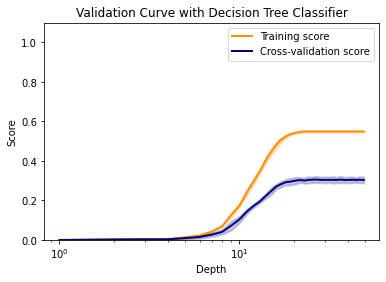

In [14]:
print(__doc__)
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
param_range = np.arange(1,50)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), Xtrain, ytrain, param_name="max_depth",scoring='f1',param_range=param_range,n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Tree Classifier")
plt.xlabel("Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [15]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=20)
clf = WOE()
clf.fit(Xtrain, ytrain)
Xtrain = clf.transform(Xtrain)
Xtest = clf.transform(Xtest)
lr = RandomForestClassifier(n_estimators=100,class_weight='balanced')
lr.fit(Xtrain,ytrain)
print("Training Accuracy")
print(lr.score(Xtrain,ytrain))
print("Testing Accuracy")
print(lr.score(Xtest,ytest))
predicted = lr.predict(Xtest)
print(confusion_matrix(ytest,predicted))
print(classification_report(ytest,predicted))

scoresdt = cross_val_score(lr,Xtrain,ytrain,cv=10,scoring='f1')
print(scoresdt)
print("Average f1")
print(np.mean(scoresdt))

Training Accuracy
0.8540030858906223
Testing Accuracy
0.7996434448710916
[[5428 1019]
 [ 442  403]]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      6447
           1       0.28      0.48      0.36       845

    accuracy                           0.80      7292
   macro avg       0.60      0.66      0.62      7292
weighted avg       0.85      0.80      0.82      7292

[0.37527594 0.36568849 0.37927233 0.37379162 0.36144578 0.40138408
 0.38222222 0.38052095 0.38920135 0.38042269]
Average f1
0.3789225455450275


In [16]:
lr.predict(Xtest)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [17]:
lr.predict_proba(Xtest)

array([[0.99      , 0.01      ],
       [0.53641919, 0.46358081],
       [0.82113873, 0.17886127],
       ...,
       [1.        , 0.        ],
       [0.28115229, 0.71884771],
       [0.69287435, 0.30712565]])

In [18]:
import warnings
warnings.filterwarnings('ignore')
#Model Comparison
from sklearn import model_selection
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)
gb = GradientBoostingClassifier(n_estimators=100)
models = []
models.append(('Logistic Regression',lr))
models.append(('Decision Tree Classifier',dt))
models.append(('Random Forest Classifier',rf))
models.append(('Gradient Boosting Classifier',gb))

Logistic Regression: 0.000000 (0.000000)
Decision Tree Classifier: 0.228013 (0.015466)
Random Forest Classifier: 0.234056 (0.014719)
Gradient Boosting Classifier: 0.002907 (0.002874)


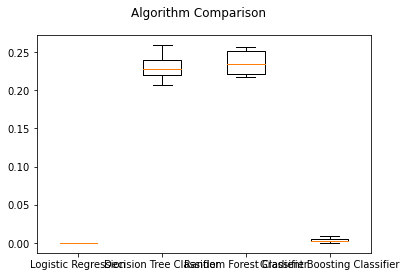

In [19]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, Xtrain, ytrain, cv=kfold,scoring='recall')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.median(cv_results), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [36]:
rf.fit(X,y)

RandomForestClassifier()

In [22]:
clf

WOE(mono_custom_binning={'AMT_INCOME_TOTAL': array([-0.04637093, -0.04155892,  0.09237436]),
                         'CNT_CHILDREN': array([-0.01659242,  0.13598124]),
                         'CNT_FAM_MEMBERS': array([-0.00919695,  0.02400246]),
                         'CODE_GENDER': array([-0.04712514,  0.09081312]),
                         'DAYS_BIRTH': array([-0.07975887, -0.06089142,  0.13023599]),
                         'DAYS_EMPLOYED': array([-0.04419908,  0.01154668,  0.03146704]),
                         'FL...
                                   -0.1318679456801238: -0.11446141433072238,
                                   -0.017515560578136035: -0.01385988490527623,
                                   0.08852078989220076: 0.07953020152930902,
                                   0.1043667983422789: 0.07262851006566007},
              'OCCUPATION_TYPE': {Interval(-0.67, -0.0599, closed='right'): -0.1125126625719525,
                                  Interval(-0.0599, 0.0545, closed='right'): -0.0007512821569452574,
                                  Interval(0.0545, 0.555, closed='right'): 0.14533962424736688}})

In [31]:
from sklearn.pipeline import Pipeline
from xverse.transformer import WOE
from sklearn.ensemble import RandomForestClassifier

pipe1 = Pipeline([
    ('woe',WOE()),
    ('rfc',RandomForestClassifier())
])

In [32]:
import pickle

filename = 'credit_card_approval.pkl'
pickle.dump(pipe1,open(filename,'wb'))

In [26]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from xverse.transformer import WOE
from sklearn.ensemble import RandomForestClassifier
import pickle
pipe = pickle.load(open('credit_card_approval.pkl' , 'rb'))

st.title('Credit Card Approval App')
st.subheader('By Mayur Shrotriya')

st.sidebar.image("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTKSiEsPKQAUEEk7kmEy1Rb7YotukM86O286A&usqp=CAU",width=150)
st.sidebar.markdown("[Connect with me on Linkedin!](https://www.linkedin.com/in/mayur-shrotriya-b45133142/)")



c1 , c2, c3 = st.columns(3)


CODE_GENDER = c1.radio('Gender:', ['Male', 'Female'])
CODE_GENDER = 'M' if CODE_GENDER == 'Male' else 'F'

FLAG_OWN_CAR = c2.radio('Own a car?:', ['Yes', 'No'])
FLAG_OWN_CAR = 0 if FLAG_OWN_CAR == 'No' else 1

FLAG_OWN_REALTY = c3.radio('Own a property?:', ['Yes', 'No'])
FLAG_OWN_REALTY = 0 if FLAG_OWN_REALTY == 'No' else 1


c1 , c2 = st.columns(2)
CNT_CHILDREN = c1.number_input('Count of Children :',min_value = 0, max_value = 20)
CNT_FAM_MEMBERS = c2.number_input('Count of Family Members :',min_value = 0, max_value = 20)

AMT_INCOME_TOTAL = c1.number_input('Total Income :')
NAME_INCOME_TYPE = c2.selectbox('Income Type',['Working', 'Commercial associate', 'Pensioner', 'State servant', 'Student'])

NAME_EDUCATION_TYPE = c1.selectbox('Education Type :',['Higher education', 'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree'])
NAME_FAMILY_STATUS = c2.selectbox('Family Status', ['Civil marriage', 'Married', 'Single / not married', 'Separated', 'Widow'])

NAME_HOUSING_TYPE = c1.selectbox('House Type :',['Rented apartment', 'House / apartment', 'Municipal apartment', 'With parents', 'Co-op apartment', 'Office apartment'])
AGE = c2.number_input('Age (In Years)',max_value = 100)
DAYS_BIRTH = - AGE * 365 

WORK_YEARS = c1.number_input('Work Years',max_value = 70)
DAYS_EMPLOYED = - WORK_YEARS / 365
OCCUPATION_TYPE = c2.selectbox('Occupation Type', ['NA', 'Security staff', 'Sales staff', 'Accountants', 'Laborers', 'Managers', 'Drivers', 'Core staff', 'High skill tech staff', 'Cleaning staff', 'Private service staff', 'Cooking staff', 'Low-skill Laborers', 'Medicine staff', 'Secretaries', 'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'])

FLAG_MOBIL = c1.radio('Own a Mobile?',['Yes','No'])
FLAG_MOBIL = 0 if FLAG_MOBIL == 'No' else 1

FLAG_WORK_PHONE = c2.radio('Own a Work Phone?',['Yes','No'])
FLAG_WORK_PHONE = 0 if FLAG_WORK_PHONE == 'No' else 1

FLAG_PHONE = c1.radio('Own a Phone?',['Yes','No'])
FLAG_PHONE = 0 if FLAG_PHONE == 'No' else 1

FLAG_EMAIL = c2.radio('Own a Email?',['Yes','No'])
FLAG_EMAIL = 0 if FLAG_EMAIL == 'No' else 1



inp = pd.DataFrame([[CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, DAYS_BIRTH, DAYS_EMPLOYED, FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS]],columns=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 
               'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 
               'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'])
st.write(inp)

pred = pipe.predict(inp)

if pred == 1:
    out = 'Your Credit Card is Approved!'
else:
    out = 'Your Credit Card is Not Approved!'
    
if st.button('Predict Approval for Credit Card'):
    st.success(out)

Overwriting app.py
